#### Histograms

##### Plotting a histogram of iris data
For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use sns.set(), where sns is the alias that seaborn is imported as.

In [1]:
#Import plotting modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set default Seaborn style
sns.set()

In [3]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

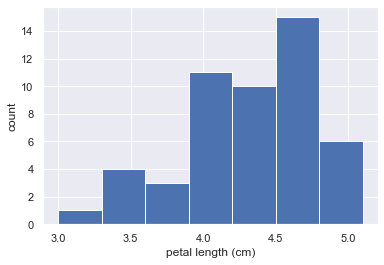

In [4]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)


# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)


# Convert number of bins to integer: n_bins
n_bins = int(n_bins)


# Plot the histogram
_= plt.hist(versicolor_petal_length, bins = n_bins)


# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

#### Making a Bee Swarm Plot
##### Binning bias
Binning bias; you might interpret your plot differently for two different choices of bin number. An additional problem with histograms is that we are not plotting all of the data. We are sweeping the data into bins, and losing their actual values.
To remedy these problems we can make a bee swarm plot, also called a swarm plot.

In [5]:
#Loading iris data into a variable called iris 
iris = datasets.load_iris()

In [6]:
#Creating a dataFrame of the iris data
X = iris.data
y = iris.target_names
iris_dataset = pd.DataFrame(X,  columns = iris.feature_names)
iris_dataset['species'] = iris.target

In [7]:
print(y)

['setosa' 'versicolor' 'virginica']


In [8]:
print(iris_dataset.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [9]:
# Changing 0, 1 , 2 in species column to match names of species(0: 'setosa', 1: 'versicolor', 2 : 'virginica')
species_mapper = {0 : y[0], 1 : y[1], 2 : y[2]}
iris_dataset['species'] = iris_dataset['species'].map(species_mapper)

In [10]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


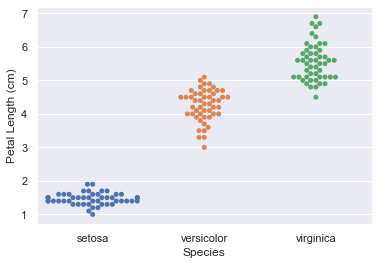

In [11]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = 'species', y = 'petal length (cm)', data = iris_dataset)

# Label the axes
_= plt.xlabel('Species')
_= plt.ylabel('Petal Length (cm)')


# Show the plot
plt.show()


Conclusion: I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.

The bee swarm plot has a real problem. The edges will have overlapping data points should you have a very large dataset, which was necessary in order to fit all points onto the plot. We are now obfuscating data. So, using a bee swarm plot here is not the best option. As an alternative, we can compute an empirical cumulative distribution function, or ECDF.

#### Computing the ECDF
We will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. We will use this function over and over again. ECDFs are among the most important plots in statistical analysis. 

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1 ) / n

    return x, y

#### Plotting the ECDF
We will now use the ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. Then plot the ECDF. 

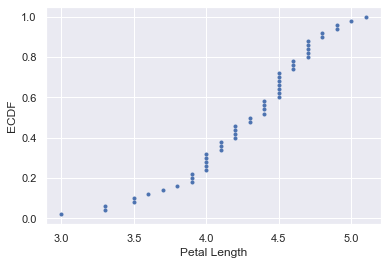

In [13]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_= plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')


# Label the axes
_= plt.xlabel('Petal Length')
_= plt.ylabel('ECDF')


# Display the plot
plt.show()

#### Comparison of ECDFs
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species

In [14]:
# setosa = iris_dataset['species'] == 'setosa'
# setosa_petal_length = iris_dataset[setosa]['petal length (cm)']

In [15]:
# setosa_petal_length = np.array(setosa_petal_length)
# setosa_petal_length

Since we will be using the petal lengths of the various species in the dataset, let's define a function to do just that and return the values in a numpy array

In [16]:
def extract_petal_length(df, flower, name_of_col = 'species'):
    column_selection = df['species'] == flower
    species_petal_length = df[column_selection]['petal length (cm)']
    return np.array(species_petal_length)

In [17]:
setosa_petal_length = extract_petal_length(iris_dataset, 'setosa')

In [18]:
setosa_petal_length

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [19]:
versicolor_petal_length = extract_petal_length(iris_dataset, 'versicolor')

In [20]:
virginica_petal_length = extract_petal_length(iris_dataset, 'virginica')

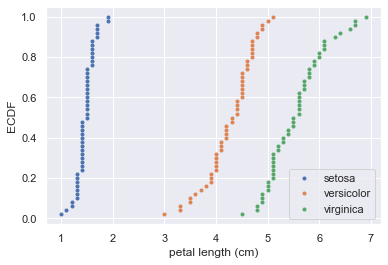

In [21]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_= plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_= plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_= plt.plot(x_virg, y_virg, marker = '.', linestyle = 'none')
 
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

In [22]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


##### computing percentiles

In [23]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)


[3.3    4.     4.35   4.6    4.9775]


#### Comparing percentiles to ECDF


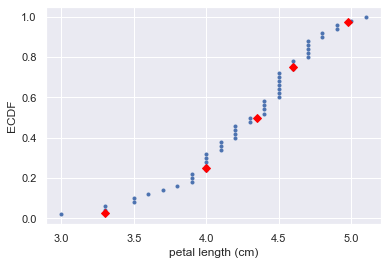

In [24]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle = 'none')

# Show the plot
plt.show()



##### Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine.

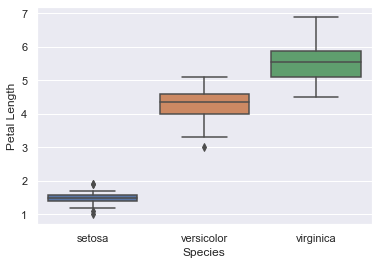

In [25]:
# Create box plot with Seaborn's default settings
_= sns.boxplot(x ='species', y = 'petal length (cm)', data = iris_dataset)

# Label the axes
_= plt.xlabel('Species')
_= plt.ylabel('Petal Length')


# Show the plot
plt.show()


#### Computing the variance


In [26]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2


# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)


# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)


# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


#### The standard deviation and the variance
The standard deviation is the square root of the variance.

In [27]:
def extract_petal_width(df, flower, name_of_col = 'species'):
    column_selection = df['species'] == flower
    species_petal_length = df[column_selection]['petal width (cm)']
    return np.array(species_petal_length)

In [28]:
versicolor_petal_width = extract_petal_width(iris_dataset, 'versicolor')

#### Scatter plots
When we made bee swarm plots, box plots, and ECDF plots, we compared the petal lengths of different species of iris. But what if we want to compare two properties of a single species? This is exactly what we will do. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

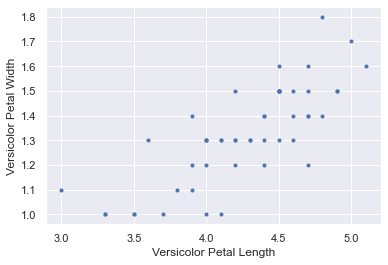

In [29]:
# Make a scatter plot
_= plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.',  linestyle = 'none')

# Label the axes
_= plt.xlabel('Versicolor Petal Length')
_= plt.ylabel('Versicolor Petal Width')

# Show the result
plt.show()

#### Computing the covariance
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [30]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)



[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


#### Computing the Pearson correlation coefficient
the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 and the value we are after is entry [0,1].

We will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient.  We will then use this function to compute it for the petal lengths and widths of I. versicolor.


In [31]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

### Random Number Generators and Hacker Statistics

The basic idea is that instead of literally repeating the data acquisition over and over again, we can simulate those repeated measurements using Python. For our first simulation, we will take a cue from our forebears. The concepts of probability originated from studies of games of chance by Pascal and others in the 17th century, so we will simulate
coin flips. Specifically, we will simulate the outcome of 4 successive coin flips. Our goal is to compute the probability that we will get four heads out of four flips. Numpy's random module, a suite of functions based on pseudorandom number generation, will be your main engine for doing this. To simulate a coin flip, we will use the function np dot random dot random, which draws a number between zero and one such that all numbers in this interval are equally likely to occur. If the number we draw is less than point-5, which has a 50% chance of happening, we say we got heads, and we get tails otherwise. This type of experiment, where the result is either True (heads) or False (tails) is referred to as a Bernoulli trial. The pseudorandom number generator works by starting with an integer, called a seed, and then generates random numbers in succession. The same seed gives the same sequence of random numbers, hence the name, "psuedorandom number generation". So, if you want to have reproducible code, it is a good idea to seed the random number generator using the np dot random dot seed function.Now, to do our coin flips, we import NumPy, seed the random number generator, and then draw four random numbers. Conveniently, we can specify how many random numbers we want with the size keyword argument. We can compute the number of heads by summing the array of Booleans because in numerical contexts, Python treats True at one and False as zero. We want to know the probability of getting four heads if we were to repeat the four flips over and over again. We can do this with a for loop. We first initialize the count to zero. We then do 10,000 repeats of the four-flip trials. If a given trial had four heads, we increase the count. So, what is the probability of getting all four heads? It's the number of times we got all heads, divided by the total number of trials we did. The result is about point-06. Pascal and his friends did not have computers and worked out problems like these with pen and paper. While this particular problem is tractable, pen-and-paper statistics can get hard fast.

In [32]:
np.random.seed(42)
n_all_heads = 0 #Initialize number of 4 -heads trials
for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
n_all_heads/10000

0.0618

In [33]:
n_all_heads

618

#### Generating random numbers using np.random

We will generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

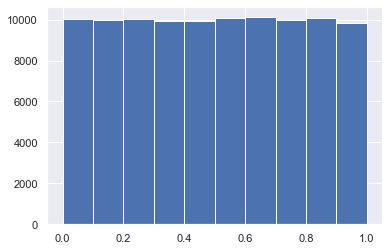

In [34]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

#### Bernoulli Trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability  of landing heads (success) and probability  of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, we will use the np.random.random() function, which returns a random number between zero and one.

In [35]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

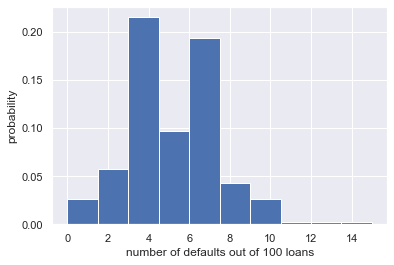

In [36]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_= plt.hist(n_defaults, density = True)
_= plt.xlabel('number of defaults out of 100 loans')
_= plt.ylabel('probability')

# Show the plot
plt.show()

##### Will the bank fail?
Plot the number of defaults you got from the cell as a CDF usine the ecdf() function we wrote earlier.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

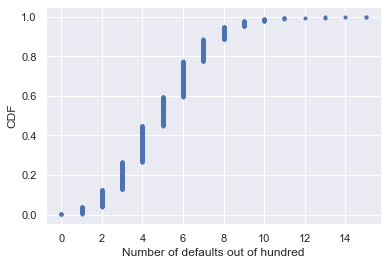

Probability of losing money = 0.022


In [37]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_= plt.plot(x, y, marker = '.', linestyle = 'none')
_= plt.xlabel('Number of defaults out of hundred')
_= plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

#### Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

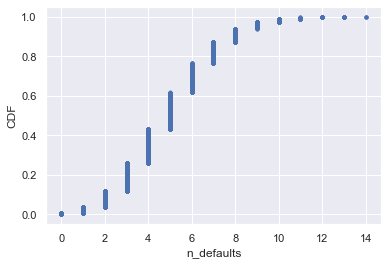

In [38]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_= plt.plot(x, y, marker = '.', linestyle = 'none')
_= plt.xlabel('n_defaults')
_= plt.ylabel('CDF')
plt.show()